In [1]:
import Motoresdecombustioninterna as th

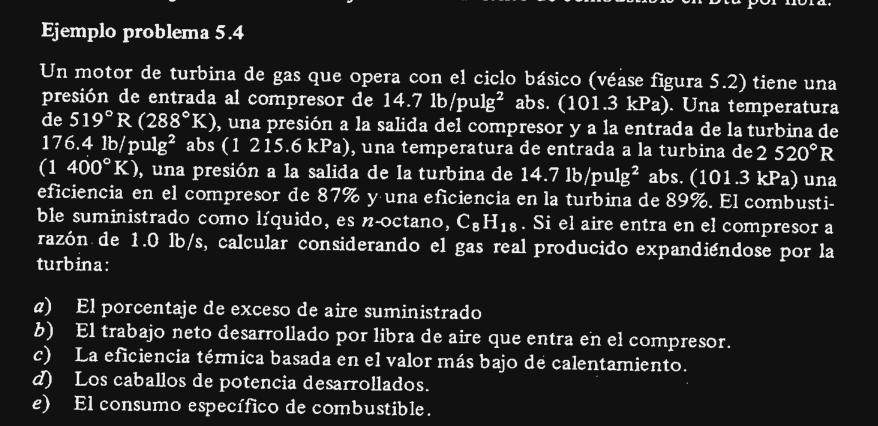

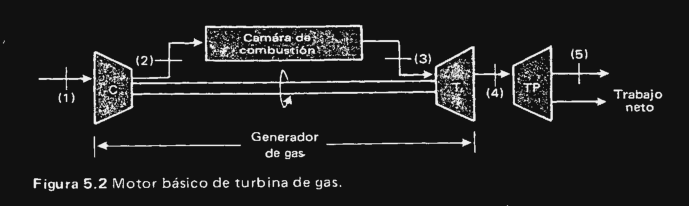

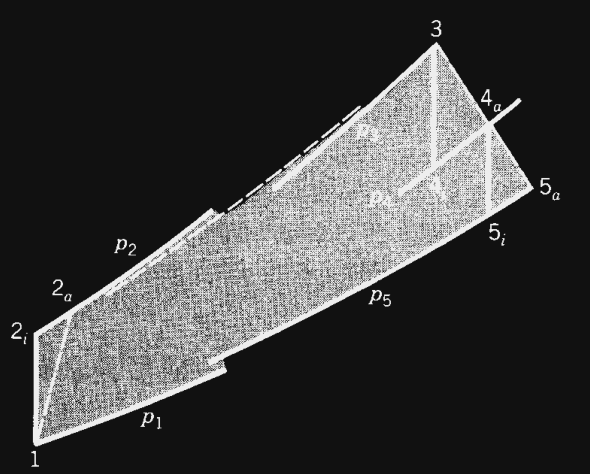

In [2]:
u = 1 # Unidades ING

In [3]:
p1=14.7 # PSI

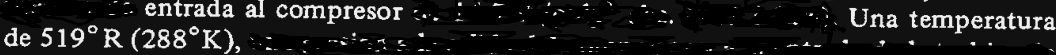

In [4]:
t1=519 # R

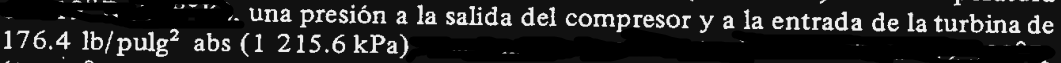

In [5]:
p2 = p3 = 176.4 # PSI

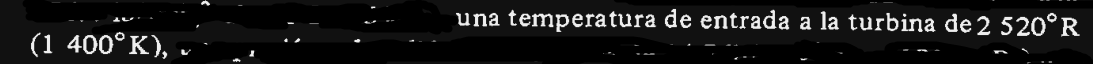

In [6]:
t3 = 2520 # R

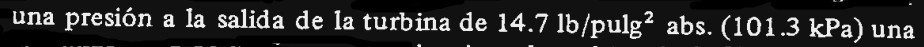

In [7]:
p5 = 14.7 # PSI

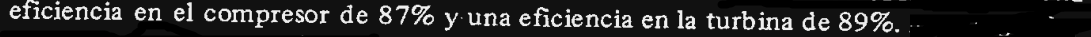

In [8]:
nc = 0.87 # Eficiencia de compresor
nt = 0.89 # Eficiencia de turbina

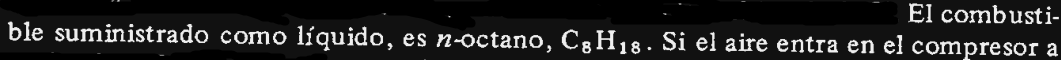

In [9]:
x = 8
pesoMolecCombustible = th.pesoCombustible(x) # lb/lbmol

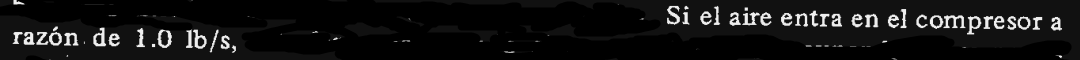

In [10]:
flujom = 1 # lb/s

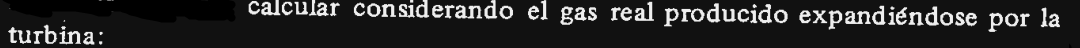

En la parte de la turbina todos los cálculos se haran con los productos de los gases

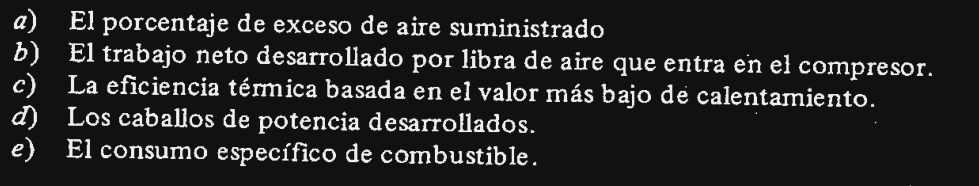

# Porcentaje de exceso de aire suministrado

In [11]:
th.reaccionGeneral(x)

La reacción general es
C8H18 + 12.5 O2 --> 8 CO2 + 9.0 H2O
La reacción con aire seco es
C8H18 + 59.6659 AS --> 8 CO2 + 9.0 H2O + 59.6659 AS-12.5 O2


Los moles para la reacción con aire seco

C8H18	1
 O2	-12.5
 CO2	8
 H2O	9.0
Aire	59.6659


In [12]:
#VALORES A MODIFICAR 
molC8H18 = 1
molO2 = -12.5
molCO2 = 8
molH2O = 9
molAireTeorico = 59.6659 # moles de aire teorico, se buscan los moles de aire real

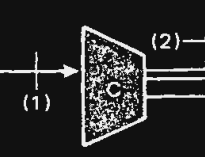

In [13]:
#Interpolación
th.TemperaturaING(t1)

,Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R),Pr
Temperatura(R),,,,
510.0,6.9530,-236.30,46.0130,1.1375
519.0,6.9539,-173.66,46.1345,1.2095
520.0,6.9540,-166.70,46.1480,1.2175


In [14]:
#VALORES A MODIFICAR DEPENDIENDO DE LA INTERPOLACIÓN
h1 = -173.66 # Btu/mol
s1 = 46.1345 # Btu/mol*R
pr1 = 1.2095 

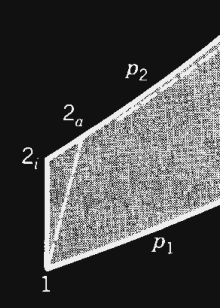

In [15]:
th.formulasFriccionPresiones()

## 2 ideal

In [16]:
pr2i = pr1*p2/p1
pr2i

In [17]:
th.PresionRelING(pr2i)

,Temperatura(R),Cp(Btu/mol*R),h(Btu/mol),s(Btu/mol*R)
Pr,,,,
14.230,1040.000000,7.241000,3507.000000,51.033000
14.514,1045.546875,7.245715,3547.214844,51.071273
15.254,1060.000000,7.258000,3652.000000,51.171000


In [18]:
#VALORES A MODIFICAR DEPENDIENDO DE LA INTERPOLACIÓN
t2i = 1045.546875
h2i = 3547.214844
s2i = 51.071273

## 2 real (a)

In [19]:
h2a = th.eficienciaCompresor(eficCompresor=nc, h1 = h1, h2i = h2i)
h2a

In [20]:
th.EntalpiaING(h2a)

,Temperatura(R),Cp(Btu/mol*R),s(Btu/mol*R),Pr
h(Btu/mol),,,,
4089.100000,1120.000000,7.311000,51.572000,18.666000
4103.207637,1121.927273,7.312735,51.584527,18.787129
4235.500000,1140.000000,7.329000,51.702000,19.923000


In [21]:
#VALORES A MODIFICAR DEPENDIENDO DE LA INTERPOLACIÓN
t2a = 1121.927273
s2a = 51.584527
pr2a = 18.787129

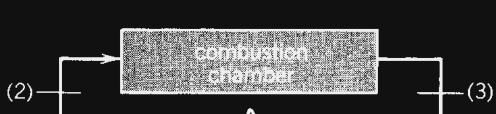

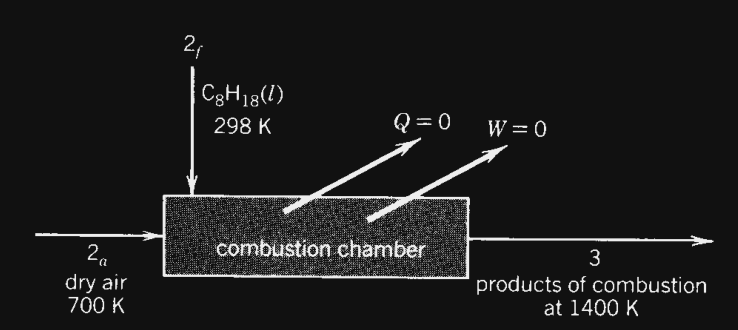

In [22]:
print("Temperatura 2a del aire:",t2a, "\nTemperatura 3 de los productos:", t3)

Temperatura 2a del aire: 1121.927273 
Temperatura 3 de los productos: 2520


In [23]:
molAireReal = (molCO2*th.moleculaEntalpia("co2",t3,u)
              +molH2O*th.moleculaEntalpia("h2o",t3,u)
              +molO2*th.moleculaEntalpia("o2",t3,u)
              -molC8H18*th.moleculaEntalpia("c8h18",t3,u)
              )/(th.moleculaEntalpia("aire seco",t2a,u)-th.moleculaEntalpia("aire seco",t3,u))

molAireReal # 1/lbmolCombustible

In [24]:
porcExcesoAire = th.excesoAire(suministradaReal=molAireReal, suministradaTeorica=molAireTeorico)
porcExcesoAire

In [25]:
relCA = th.relCombustibleAireGases(C=x, CM = 1, AM = molAireReal)
relCA

In [26]:
hCombustion = (+molC8H18*th.moleculaEntalpia("C8H18",537,u)
               -molCO2*th.moleculaEntalpia("CO2",537,u)
               -molH2O*th.moleculaEntalpia("H2O",537,u)
               ) #Reactivos-Productos
hCombustion

Calor de combustión a 25° = 537°R = 298°K

In [27]:
qhLbAire = relCA*hCombustion/pesoMolecCombustible
# relCA -> [lbCombustible/lbAire] 
# hCombustion -> [BTU/lbmolCombustible]
# pesoMolecCombustible -> [lbCombustible/lbmolCombustible]
qhLbAire # BTU/lbAire

In [28]:
qhMolAire = qhLbAire*th.aireSecoMol
qhMolAire # BTU/lbmolAire

Moles totales para los productos

In [29]:
molProductos = molCO2+molH2O+molAireReal+molO2
molProductos # moles total

# Trabajo neto desarrollado por libra de aire que entra al compresor

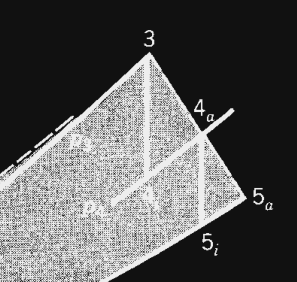

In [30]:
h4a = h5a = h3 = h4a = 0 # Definición de variables
wneto = wPotenciaTurbina = h4a-h5a
wcompresor = h2a-h1
wTurbinaGasA = h3 - h4a
wTurbinaGasA = wcompresor
wTurbinaGasA # BTU/lbmolAire

In [31]:
h3 = (molCO2*th.moleculaEntalpia("CO2",t3,u)
      +molH2O*th.moleculaEntalpia("H2O",t3,u)
      +molAireReal*th.moleculaEntalpia("aire seco",t3,u)
      +molO2*th.moleculaEntalpia("O2",t3,u)
      )
h3 #Entalpia/molCombustible

El trabajo de turbina de gas se debe transformar a BTU/lbmolCombustible

In [32]:
wTurbinaGasC = wTurbinaGasA*molAireReal # BTU/lbmolAire * lbmolAire/lbmolCombustible
wTurbinaGasC # BTU/lbmolCombustible

In [33]:
h4a = h3-wTurbinaGasC
h4a #BTU/lbmolCombustible

In [34]:
h4i = th.eficienciaTurbinaGas(eficTurbinaGas=nt,h3=h3,h4r=h4a)
h4i #BTU/lbmolCombustible

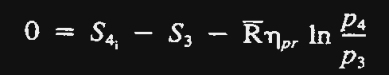

Se necesita averiguar la temperatura de las entalpias de combustible anteriores (h4a, h4i) para poder conseguir más adelante el valor de las presiones y entropias

In [35]:
f = lambda T: (molCO2*th.moleculaEntalpia("CO2",T,u)
               +molH2O*th.moleculaEntalpia("H2O",T,u)
               +molAireReal*th.moleculaEntalpia("aire seco",T,u)
               +molO2*th.moleculaEntalpia("O2",T,u)) # Entalpia
# Solamente los productos, ya que son los que van después del punto 3
g = lambda T: (molCO2*th.moleculaEntropia("CO2",T,u)
               +molH2O*th.moleculaEntropia("H2O",T,u)
               +molAireReal*th.moleculaEntropia("Aire seco",T,u)
               +molO2*th.moleculaEntropia("O2",T,u)) # Entropia
# Solamente los productos, ya que son los que van después del punto 3

In [36]:
f4i = lambda T: f(T)-h4i # Ecuación para conseguir T4i
f4a = lambda T: f(T)-h4a # Ecuación para conseguir T4a

In [37]:
t4i = th.raizFuncion(f4i,0.000001,u)
t4i # °R

5.95726305618882e-7
N° de iteraciones: 39


In [38]:
t4a = th.raizFuncion(f4a,0.0001,u)
t4a # °R

-4.41556621808559e-5
N° de iteraciones: 32


In [39]:
s3 = g(t3)
s3 # Entropia de los productos con la temperatura 3

In [40]:
s4i = g(t4i)
s4i # Entropia de los productos con la temperatura 4i

In [41]:
s4a = g(t4a)
s4a # Entropia de los productos con la temperatura 4a

In [42]:
p4 = th.expansionIsentropica34i(u = u, s3 = s3, s4i = s4i, p3 = p3,molPr = molProductos)
p4 # Presión 4

In [43]:
s5i = th.expansionIsentropica45i(u = u, s4a = s4a, p4 = p4, p5 = p5, molPr = molProductos)
s5i # entropia 5 ideal

Se tiene la entropia 5 ideal para los productos, por lo que ahora se debe conseguir su temperatura y entalpia

In [44]:
g5i = lambda T: g(T) - s5i

In [45]:
t5i = th.raizFuncion(g5i,0.0001,u)
t5i # °R

-4.28241164627252e-5
N° de iteraciones: 22


In [46]:
h5i = f(t5i)
h5i # BTU/lbmolCombustible*R

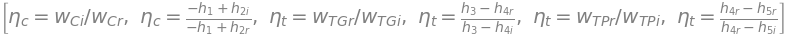

In [47]:
th.formulasFriccion()

In [48]:
wPotenciaTurbina_i = h4a-h5i
wPotenciaTurbina_i #BTU/lbmolCombustible

In [49]:
h5a = th.eficienciaTurbinaPotencia(eficTurbinaPotencia=nt,h4r=h4a,h5i=h5i)
h5a # BTU/lbmolCombustible

In [50]:
wPotenciaTurbina_a=h4a-h5a
wPotenciaTurbina_a #BTU/lbmolCombustible

In [51]:
wPotenciaTurbina_a_aire = wPotenciaTurbina_a/molAireReal
# BTU/lbmolCombustible*lbmolCombustible/lbmolAire
wPotenciaTurbina_a_aire #BTU/lbmolAire

# Eficiencia térmica basada en el valor más bajo de calentamiento

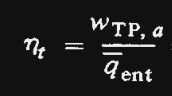

In [52]:
wPotenciaTurbina_a_aire # BTU / lbmolAire

In [53]:
qhMolAire # BTU/lbmolAire

In [54]:
nt=wPotenciaTurbina_a_aire/qhMolAire
nt # Se cancelan las unidades y queda la relación térmica

# Los caballos de potencia desarrollados

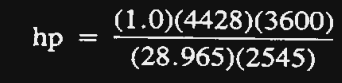

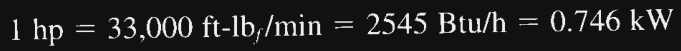

In [55]:
hp = (flujom*wPotenciaTurbina_a_aire*3600)/(th.aireSecoMol*2545)
#(lb/s)*(BTU/lbmolAire)*(3600s/h)*(lbmolAire/lb)*(hp*h/BTU)
hp # hp

# El consumo específico de combustible

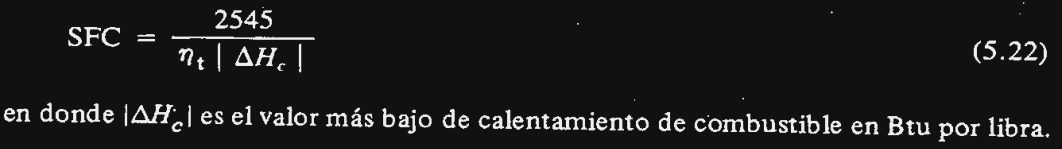

In [56]:
SFC = 2545*pesoMolecCombustible/(nt*hCombustion)
SFC # lb/hp*h

# Extras

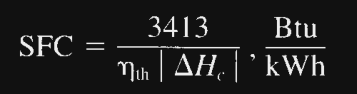